# Тема “Обучение без учителя”

## Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [61]:
# Загрузка датасета
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

C:\Users\Nina\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [62]:
boston['target'][0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [63]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
X.sample()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
424,8.79212,0.0,18.1,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16


In [64]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [65]:
y = pd.DataFrame(boston['target'], columns=['price'])
y.describe()

,price
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [66]:
# разбиение на тренировочный и тестовый датасеты
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Стандартизация признаков тестовой модели
from sklearn.preprocessing import StandardScaler
X_st_scal = StandardScaler()
X_ss_train = X_st_scal.fit_transform(X_train)
X_ss_train = pd.DataFrame(X_ss_train, columns=boston['feature_names'])
X_ss_test = X_st_scal.fit_transform(X_test)
X_ss_test = pd.DataFrame(X_ss_test, columns=boston['feature_names'])

In [68]:
X_train.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.614,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47


In [69]:
X_ss_train.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.50032,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.50032,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474


In [70]:
# построение t-SNE-модели на стандартизированном трейне
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, learning_rate=250, random_state=42)
X_tsne_ss_train = tsne_model.fit_transform(X_ss_train)
print("Было признаков:", X_ss_train.shape[1])
print("Стало признаков: ", X_tsne_ss_train.shape[1])
X_tsne_ss_train[:2, :]

C:\Users\Nina\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


Было признаков: 13
Стало признаков:  2


array([[18.104149 , 29.184141 ],
       [ 3.3644612, -7.9096684]], dtype=float32)

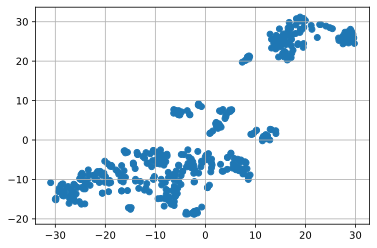

In [71]:
# диаграмма рассеяния стантартизированного трейна
plt.scatter(X_tsne_ss_train[:, 0], X_tsne_ss_train[:, 1])
plt.grid()
plt.show()

Вывод: визуально на диаграмме рассеяния выделяется три группировки (три очага) точек. Значит, целесообразно разбивать тренировочный датасет на три кластера

## Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

### ВОПРОС к ПРЕПОДАВАТЕЛЮ: 
Какой дата сет нужно бить на кластеры: исходный X_train? или станартизированный X_ss_train? Какой из датасетов обычно используют для кластеризации (исходный? или стандартизированный?)
Я попробовала разбить на кластеры и визуализировать каждую из них. Почему-то получились схематично разные картинки. Почему-то на диаграмме исходного стрейна в фиолетовый кластер "затесалась" точка из желтого кластера. Почему-то на картинках кластеры исходного и стандартизированного трейнов получились пропорционально разные. Глядя на результаты, я начала сомневаться , все ли правильно я делаю

Алгоритм очень чувствителен к масштабу признаков, так как при формировании кластеров мы измеряем расстояние (в частности, Евклидово расстояние), то признаки с большим масштабом будут иметь больший вес.
Поэтому, для k средних как для алгоритма, который разбивает множество элементов векторного пространства на заранее известное число кластеров k, все данные должны быть стандартизированы, приведены к общему виду.
Когда Вы применили данный алгоритм к исходному сету - данные обладают различными единицами измерения.

C:\Users\Nina\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


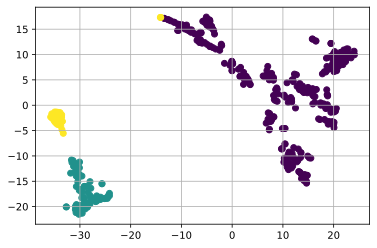

In [72]:
# разбиение исходного трейна на кластеры (ради любопытства)
from sklearn.cluster import KMeans
k_model = KMeans(n_clusters=3, max_iter=100, random_state=42)
k_labels = k_model.fit_predict(X_train)
X_tsne_train = tsne_model.fit_transform(X_train)
# диаграмма рассеяния исходного трейна с визуализацией полученных кластеров
plt.scatter(X_tsne_train[:, 0], X_tsne_train[:, 1], c=k_labels)
plt.grid()
plt.show()

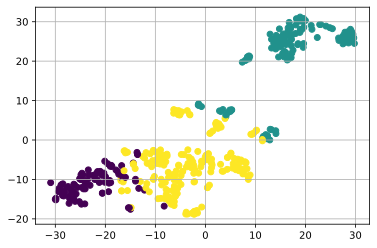

In [81]:
# разбиение стандартизированного трейна на кластеры
k_labels_ss_train = k_model.fit_predict(X_ss_train)
# диаграмма рассеяния стандартизированного трейна с визуализацией полученных кластеров
plt.scatter(X_tsne_ss_train[:, 0], X_tsne_ss_train[:, 1], c=k_labels_ss_train)
plt.grid()
plt.show()

In [82]:
# Вычисление средних price и CRIM по кластерам и запись в датафрейм
mean_x_y_train = []
for i in range(3):
    mean_x_y_train.append([X_train.CRIM[k_labels_ss_train==i].mean(), y_train.price[k_labels_ss_train==i].mean()])
k_mean_frame_train = pd.DataFrame(mean_x_y_train, columns=['CRIM', 'price'])
k_mean_frame_train

,CRIM,price
0,0.073566,27.788372
1,10.797028,16.165354
2,0.421660,24.958115


In [83]:
# Центры кластеров (чтоб сравнить со средними , ради любопытства)
X_train['price']=y_train
feature_list=X_train.columns
X_y_ss_train = pd.DataFrame(X_st_scal.fit_transform(X_train), columns=feature_list)
k_labels_ss_x_y = k_model.fit_predict(X_y_ss_train)
k_centres_x_y = pd.DataFrame(X_st_scal.inverse_transform(k_model.cluster_centers_), columns=feature_list)
k_centres_x_y.loc[:, ['CRIM', 'price']]

,CRIM,price
0,0.071656,27.938372
1,10.715219,16.179688
2,0.423031,24.926842


Вывод: расчет средних значений показателей CRIM и price показывает зависимость: чем более криминальный район, тем ниже цена недвижимости.   Средние по кластеру примерно равны центрам кластеров. 

## *Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [84]:
# Вычисление средних price и CRIM по кластерам на тесте
X_ss_test = pd.DataFrame(X_st_scal.transform(X_test), columns=feature_list)
k_labels_ss_test = k_model.predict(X_ss_test)
mean_x_y_test = []
for i in range(3):
    mean_x_y_test.append([X_test.CRIM[k_labels_ss_test==i].mean(), y_test.price[k_labels_ss_test==i].mean()])
k_mean_frame_test = pd.DataFrame(mean_x_y_test, columns=['CRIM', 'price'])
k_mean_frame_test

,CRIM,price
0,0.062060,31.350000
1,9.892942,16.455556
2,0.264354,21.956000


In [85]:
# Центры кластеров (чтоб сравнить со средними , ради любопытства)
X_test['price']=y_test
X_y_ss_test = pd.DataFrame(X_st_scal.fit_transform(X_test), columns=feature_list)
k_labels_ss_x_y = k_model.fit_predict(X_y_ss_test)
k_centres_x_y = pd.DataFrame(X_st_scal.inverse_transform(k_model.cluster_centers_), columns=feature_list)
k_centres_x_y.loc[:, ['CRIM', 'price']]

,CRIM,price
0,0.083085,34.553846
1,9.419182,16.710526
2,0.222501,21.717647


Вывод: Средние на тесте по кластерам сопоставимы со средними на трейне

### Вопрос к преподавателю:
Какие метрики позволяют оценить:
 - насколько качественно обучена модель кластеризации?
 - проверить достоверность разбиения тестовой выборки на кластеры по сравнению с тренировочной выборкой
 

К сожалению, нет метрик для оценки качества модели кластеризации, это одна из главных проблем обучения без учителя

Достоверность разбиения тестовой и тренировочной выборки можно определить по результатам модели, неверное разбиение может быть причиной переобучения